# **Datos de interés - Fuentes externas**

### **Librerías y modulos necesarios**

In [2]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from funciones.faltantes import * 
from ydata_profiling import ProfileReport
from ydata_profiling.config import Settings

In [2]:
config = Settings()
config.vars.num.chi_squared_threshold = 0.0

### **Data DIVIPOLA**

Antes de comenzar es importante el cargue del siguiente conjunto de datos (DIVIPOLA), el cual será utilizado más adelante para la identificación de los municipios y departamentos.

In [3]:
column_types = {"Código Departamento": "object", "Código Municipio": "object", "Código Centro Poblado": "object", "Nombre Departamento": "object", "Nombre Municipio": "object",
    "Nombre Centro Poblado	": "object", "Tipo": "object"}
url = "https://raw.githubusercontent.com/sePerezAlbor/Data/refs/heads/main/Divipola.csv"
data_divipola = pd.read_csv(url, delimiter = ",", na_values = [" "], dtype = column_types)

## **Encuesta Nacional de Calidad de Vida**

Inicialmente, la encuesta nacional de calidad de vida cuenta con varios conjuntos de datos relacionados a diferentes ámbitos de la calidad de vida. En este caso, usaremos solamente cuatro, que son de interés para este trabajo.

In [4]:
df_servicios_2023 = pd.read_csv("C:\\Users\\CCOSTA397\\OneDrive\\Desktop\\CIDEACC\\convocatoria38\\raw_data\\data_ecv\\servicios_hogar_ecv_2023.CSV", sep=';')
df_salud_2023 = pd.read_csv("C:\\Users\\CCOSTA397\\OneDrive\\Desktop\\CIDEACC\\convocatoria38\\raw_data\\data_ecv\\salud_ecv_2023.CSV", sep=';')
df_internet_2023 = pd.read_csv("C:\\Users\\CCOSTA397\\OneDrive\\Desktop\\CIDEACC\\convocatoria38\\raw_data\\data_ecv\\internet_ecv_2023.CSV", sep=';')
df_vivienda_2023 = pd.read_csv("C:\\Users\\CCOSTA397\\OneDrive\\Desktop\\CIDEACC\\convocatoria38\\raw_data\\data_ecv\\vivienda_ecv_2023.CSV", sep=';')
df_hogar_2023 = pd.read_csv("C:\\Users\\CCOSTA397\\OneDrive\\Desktop\\CIDEACC\\convocatoria38\\raw_data\\data_ecv\\hogar_ecv_2023.CSV", sep=';')

Veamos el tamaño de estos datos:

In [5]:
dataframes = {
    'Vivienda': df_vivienda_2023,
    'Servicios': df_servicios_2023,
    'Salud': df_salud_2023,
    'Internet': df_internet_2023,
    'Hogar': df_hogar_2023
}

for nombre, df in dataframes.items():
    print(f"{nombre}: {df.shape}")


Vivienda: (86063, 47)
Servicios: (86405, 96)
Salud: (240212, 153)
Internet: (223695, 86)
Hogar: (240212, 79)


Nótese que los tamaños de los dataframes son diferentes en todos los casos. Veamos a qué se debe esto.

In [6]:
for nombre, df in dataframes.items():
    print(f"\n Data de {nombre}:\n")
    display(df.head(5))  # si estás en Jupyter


 Data de Vivienda:



,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,P1_DEPARTAMENTO,P1_MUNICIPIO,REGION,FEX_C,CANT_HOG_COMPLETOS,CANT_HOGARES_VIVIENDA,...,P5661S5,P5661S6,P5661S7,P3157,P3157S1,P3157S2,P3157S3,P3157S4,FECHA_CARGA,P5660S3
0,7910114,1,1,1,73,1,3,282.370945,1,1,...,3,3,1,NaN,1,1,1,1,08-10-2023 10:11:20,2023
1,7910115,1,1,1,97,1,9,3.054217,1,1,...,1,3,2,NaN,1,2,2,1,08-10-2023 10:11:20,2023
2,7910119,1,1,1,66,440,3,31.288477,1,1,...,1,1,1,NaN,2,1,2,2,08-10-2023 10:11:20,2023
3,7910120,1,1,1,47,245,1,73.577749,1,1,...,1,1,4,NaN,2,2,2,2,08-10-2023 10:11:20,2023
4,7910121,1,1,1,18,1,3,48.549967,1,1,...,2,2,2,NaN,1,1,1,2,08-10-2023 10:11:20,2023



 Data de Servicios:



,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,FEX_C,P5000,P5010,P791,P5018,P5018S1,...,P3174S1,P3174S2,P3174S3,P3174S4,P3174S5,I_HOGAR,I_UGASTO,PERCAPITA,I_OU,CANT_PERSONAS_HOGAR
0,7910114,1,1,1,282.370945,5,2,1,60000.0,1.0,...,NaN,NaN,NaN,NaN,NaN,775000.0,775000.0,387500.0,0.0,2
1,7910115,1,1,1,3.054217,4,2,3,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,2200000.0,2200000.0,440000.0,0.0,5
2,7910119,1,1,1,31.288477,3,2,1,100000.0,1.0,...,NaN,NaN,NaN,NaN,NaN,410000.0,410000.0,205000.0,0.0,2
3,7910120,1,1,1,73.577749,4,1,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,720000.0,720000.0,360000.0,0.0,2
4,7910121,1,1,1,48.549967,3,2,1,42000.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1892500.0,1892500.0,946250.0,0.0,2



 Data de Salud:



,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,FEX_C,P6090,P768,P6100,P6115,P5669,...,P3189S2A1,P8561,P3335,P3335S1,P3335S1A1,P8584,P5694,P5452,P6161,P1089
0,7910114,1,1,1,282.370945,1,NaN,3.0,NaN,NaN,...,NaN,NaN,1.0,3.0,17.0,2.0,NaN,NaN,NaN,NaN
1,7910114,2,1,2,282.370945,1,NaN,3.0,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7910115,1,1,1,3.054217,1,NaN,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7910115,2,1,2,3.054217,1,NaN,3.0,NaN,NaN,...,NaN,NaN,1.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN
4,7910115,3,1,3,3.054217,1,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Data de Internet:



,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,FEX_C,P1910,P1911,P1912,P1084,P1710,...,P1080S4,P1080S5,P1080S6,P804,P805,P805S1,P805S2,P805S3,P805S4,P805S5
0,7910114,1,1,1,282.370945,5,5,5,1,NaN,...,1.0,NaN,NaN,1,NaN,1.0,NaN,NaN,NaN,NaN
1,7910114,2,1,2,282.370945,2,5,5,1,NaN,...,1.0,NaN,NaN,1,NaN,1.0,NaN,1.0,NaN,NaN
2,7910115,1,1,1,3.054217,5,5,5,5,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,1.0,NaN,NaN
3,7910115,2,1,2,3.054217,5,5,5,5,NaN,...,NaN,NaN,NaN,2,NaN,NaN,NaN,1.0,NaN,NaN
4,7910115,3,1,3,3.054217,5,2,5,2,NaN,...,NaN,NaN,NaN,2,NaN,1.0,NaN,NaN,NaN,NaN



 Data de Hogar:



,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,FEX_C,P6016,P1894,P6020,P6034,P6040,...,P1898,P1899,P3175,P1901,P1903,P1904,P1905,P1927,P3038,P3039
0,7910114,1,1,1,282.370945,1,3,2,1,43,...,6.0,7.0,6.0,8.0,6.0,3.0,10.0,7.0,1.0,2.0
1,7910114,2,1,2,282.370945,2,2,2,1,16,...,7.0,6.0,6.0,8.0,0.0,0.0,10.0,8.0,NaN,NaN
2,7910115,1,1,1,3.054217,1,3,1,1,54,...,2.0,8.0,6.0,7.0,5.0,1.0,8.0,6.0,2.0,1.0
3,7910115,2,1,2,3.054217,2,3,2,1,50,...,7.0,8.0,9.0,8.0,5.0,3.0,8.0,8.0,1.0,2.0
4,7910115,3,1,3,3.054217,3,3,1,1,24,...,7.0,7.0,7.0,8.0,7.0,7.0,4.0,7.0,2.0,1.0


Podemos ver que en todos los dataframe existen las columnas de `DIRECTORIO`, `SECUENCIA_ENCUESTA`, `SECUENCIA_P`, `ORDEN`. Estas columnas corresponden a los identificadores únicos de cada tabla. Ahora bien, en los dataframes de salud e internet, tienen más observaciones y esto se debe a que, en las datas de vivienda y servicios solo fueron encuestados una persona por vivienda, mientras que en las de salud e internet se encuestaron a cada persona de cada hogar de cada vivienda.

- `DIRECTORIO`: Representa código único de una vivienda.
- `SECUENCIA_ENCUESTA`: Representa el conteo de cada hogar dentro de una vivienda.
- `SECUENCIA_P`: Representa una persona dentro de cada hogar de una vivienda.
- `ORDEN`: Representa el orden de una persona encuestada dentro de una vivienda.


Dado que la base de datos de viviendas contiene `86.063` registros, podemos identificar las viviendas únicas encuestadas. Como nuestro interés se centra en analizar cómo las condiciones sociodemográficas influyen en la salud de las personas dentro de su entorno, en este caso decidimos conservar únicamente un registro por vivienda: la primera persona encuestada del primer hogar. Esta decisión nos permitirá, más adelante, realizar una concatenación adecuada entre los distintos *DataFrames*, evitando tanto la duplicación de datos como la pérdida de información.


In [7]:
df_servicios_2023 = df_servicios_2023.drop_duplicates(subset='DIRECTORIO', keep='first')
df_vivienda_2023 = df_vivienda_2023.drop_duplicates(subset='DIRECTORIO', keep='first')
df_salud_2023 = df_salud_2023.drop_duplicates(subset='DIRECTORIO', keep='first')
df_internet_2023 = df_internet_2023.drop_duplicates(subset='DIRECTORIO', keep='first')
df_hogar_2023 = df_hogar_2023.drop_duplicates(subset='DIRECTORIO', keep='first')

In [8]:
dataframes = {
    'Vivienda': df_vivienda_2023,
    'Servicios': df_servicios_2023,
    'Salud': df_salud_2023,
    'Internet': df_internet_2023,
    'Hogar': df_hogar_2023
}

for nombre, df in dataframes.items():
    print(f"{nombre}: {df.shape}")

Vivienda: (86063, 47)
Servicios: (86063, 96)
Salud: (86063, 153)
Internet: (86063, 86)
Hogar: (86063, 79)


Ahora los conjuntos de datos cuentan con la misma cantidad de observaciones/registros.

### **Filtración por columnas de interés**

Al observar el tamaño de cada conjunto de datos, vemos que hay presencia de diferentes tipos de columnas y variables. Luego de una respectiva investigación, filtraremos estos conjuntos con el fin de obtener solo las columnas de nuestro interés. Más adelante se explicará el significado de cada variable.

In [9]:
columnas_vivienda = [
    'DIRECTORIO', 'FEX_C', 'P1_DEPARTAMENTO', 'P1_MUNICIPIO', 'REGION', 'P5661',
    'P5661S1', 'P5661S2', 'P5661S3', 'P5661S4', 'P5661S9',
    'P5661S5', 'P5661S6', 'P5661S7',
    'P4065', 'P4065S1', 'P4065S2', 'P4065S3', 'P4065S4', 'P4065S5'
]

df_vivienda = df_vivienda_2023[columnas_vivienda]


In [10]:
columnas_servicios = ['DIRECTORIO', 'I_HOGAR']
df_servicios = df_servicios_2023[columnas_servicios]

In [11]:
columnas_internet = ['DIRECTORIO', 'P1084']
df_internet = df_internet_2023[columnas_internet]


In [12]:
columnas_salud = [
    'DIRECTORIO',
    'P8551', 'P3511', 'P6115', 'P6100',
    'P799', 'P799S2', 'P799S3', 'P799S1', 'P799S4', 'P799S5'
]

df_salud = df_salud_2023[columnas_salud]


In [13]:
columnas_hogar = [
    'DIRECTORIO',
    'P1927'
]
df_hogar = df_hogar_2023[columnas_hogar]

Ahora, realizamos el merge de los conjuntos de datos.

In [14]:
df_ecv = pd.merge(df_vivienda, df_servicios, on='DIRECTORIO', how='left')
df_ecv = pd.merge(df_ecv, df_salud, on='DIRECTORIO', how='left')
df_ecv = pd.merge(df_ecv, df_internet, on='DIRECTORIO', how='left')
df_ecv = pd.merge(df_ecv, df_hogar, on='DIRECTORIO', how='left')

In [15]:
df_ecv.head()

,DIRECTORIO,FEX_C,P1_DEPARTAMENTO,P1_MUNICIPIO,REGION,P5661,P5661S1,P5661S2,P5661S3,P5661S4,...,P6115,P6100,P799,P799S2,P799S3,P799S1,P799S4,P799S5,P1084,P1927
0,7910114,282.370945,73,1,3,NaN,2,1,1,3,...,NaN,3.0,NaN,2,2,2,2,2,1,7.0
1,7910115,3.054217,97,1,9,NaN,3,2,3,4,...,4.0,1.0,NaN,2,2,2,2,2,5,6.0
2,7910119,31.288477,66,440,3,NaN,1,1,1,1,...,NaN,3.0,NaN,2,2,2,2,2,1,9.0
3,7910120,73.577749,47,245,1,NaN,1,1,1,2,...,NaN,3.0,NaN,2,2,2,2,2,1,8.0
4,7910121,48.549967,18,1,3,NaN,2,2,2,2,...,1.0,1.0,NaN,2,2,2,2,2,1,5.0


### **Departamentos y municipios**

Cada observación del conjunto de datos corresponde a una persona encuestada. La información disponible sobre su ubicación se encuentra a nivel de municipio, departamento y, por consiguiente, región. Actualmente, el dataset contiene los códigos DIVIPOLA para representar estas ubicaciones. Por lo tanto, se realizará la conversión de estos códigos a sus respectivos nombres, lo cual facilitará la identificación y el análisis posterior de características geográficas y sociodemográficas relevantes.


In [16]:
# Convertir a string y rellenar con ceros a la izquierda
df_ecv["P1_DEPARTAMENTO"] = df_ecv["P1_DEPARTAMENTO"].astype(str).str.zfill(2)
df_ecv["P1_MUNICIPIO"] = df_ecv["P1_MUNICIPIO"].astype(str).str.zfill(3)
df_ecv['MUNICIPIO'] = df_ecv['P1_DEPARTAMENTO'] + df_ecv['P1_MUNICIPIO']
df_ecv['REGION'] = df_ecv['REGION'].astype(str).str.zfill(2)

In [17]:
condiciones = [
    df_ecv['P1_DEPARTAMENTO'].isin(['91', '18', '94', '95', '86', '97']),
    df_ecv['P1_DEPARTAMENTO'].isin(['5', '11', '15', '17', '25', '41', '54', '63', '66', '68', '73']),
    df_ecv['P1_DEPARTAMENTO'].isin(['08', '13', '20', '23', '44', '47', '70', '88']),
    df_ecv['P1_DEPARTAMENTO'].isin(['81', '85', '50', '99']),
    df_ecv['P1_DEPARTAMENTO'].isin(['19', '27', '52', '76'])
]

regiones = ['AMAZONIA', 'ANDINA', 'CARIBE', 'ORINOQUIA', 'PACIFICA']

df_ecv['REGION'] = np.select(condiciones, regiones, default='Otra')

In [18]:
departamento_dict = dict(zip(data_divipola['Código Departamento'], data_divipola['Nombre Departamento']))
municipio_dict = dict(zip(data_divipola['Código Municipio'], data_divipola['Nombre Municipio']))
df_ecv['DEPARTAMENTO'] = df_ecv['P1_DEPARTAMENTO'].map(departamento_dict)
df_ecv['MUNICIPIO'] = df_ecv['MUNICIPIO'].map(municipio_dict)
df_ecv.drop(columns=['P5661', 'P4065', 'P799','P799S4', 'P799S5'], inplace=True)

In [19]:
df_ecv

,DIRECTORIO,FEX_C,P1_DEPARTAMENTO,P1_MUNICIPIO,REGION,P5661S1,P5661S2,P5661S3,P5661S4,P5661S9,...,P3511,P6115,P6100,P799S2,P799S3,P799S1,P1084,P1927,MUNICIPIO,DEPARTAMENTO
0,7910114,282.370945,73,001,ANDINA,2,1,1,3,1,...,1.0,NaN,3.0,2,2,2,1,7.0,IBAGUÉ,TOLIMA
1,7910115,3.054217,97,001,AMAZONIA,3,2,3,4,3,...,1.0,4.0,1.0,2,2,2,5,6.0,MITÚ,VAUPÉS
2,7910119,31.288477,66,440,ANDINA,1,1,1,1,1,...,1.0,NaN,3.0,2,2,2,1,9.0,MARSELLA,RISARALDA
3,7910120,73.577749,47,245,CARIBE,1,1,1,2,1,...,1.0,NaN,3.0,2,2,2,1,8.0,EL BANCO,MAGDALENA
4,7910121,48.549967,18,001,AMAZONIA,2,2,2,2,2,...,1.0,1.0,1.0,2,2,2,1,5.0,FLORENCIA,CAQUETÁ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86058,8201918,108.536187,66,045,ANDINA,1,1,1,1,1,...,1.0,NaN,3.0,2,2,2,2,8.0,APÍA,RISARALDA
86059,8201924,5.838985,91,001,AMAZONIA,1,1,2,1,2,...,1.0,NaN,3.0,2,2,2,5,5.0,LETICIA,AMAZONAS
86060,8201925,72.996879,66,001,ANDINA,1,1,1,1,1,...,1.0,4.0,1.0,2,2,2,1,8.0,PEREIRA,RISARALDA
86061,8201926,30.973489,66,001,ANDINA,1,1,1,1,1,...,1.0,4.0,1.0,2,2,2,5,8.0,PEREIRA,RISARALDA


### **Organización del conjunto de datos**

#### **Renombrado de variables**

In [20]:
df_ecv = df_ecv.rename(columns={
    'DIRECTORIO': 'ID',
    'FEX_C': 'FEX_C',
    'P1_DEPARTAMENTO': 'COD_DPTO',
    'P1_MUNICIPIO': 'COD_MUNI',
    'REGION': 'REGION',
    'P5661S1': 'RUIDOS',
    'P5661S2': 'MALOS_OLORES',
    'P5661S3': 'PRESENCIA_BASURAS',
    'P5661S4': 'CONTAMINACION_AIRE',
    'P5661S5': 'INVASION_ESPACIO_PUBLICO',
    'P5661S6': 'MOLESTIAS_ANIMALES',
    'P5661S7': 'PRESENCIA_INSECTOS',
    'P5661S9': 'CONTAMINACION_AGUA',
    'P4065S1': 'INUNDACIONES_DESBORDAMIENTO_CRECIENTES_ARROYOS',
    'P4065S2': 'AVALANCHAS_DERRUMBES_DESLIZAMIENTOS',
    'P4065S3': 'HUNDIMIENTO_DE_TERRENO',
    'P4065S4': 'VENTARRONES_TORMENTAS_VENDAVALES',
    'P4065S5': 'SISMO_TEMBLOR',
    'I_HOGAR': 'INGRESO_MENSUAL_TOTAL',
    'P8551': 'PAGO_SEG_SOCIAL',
    'P3511': 'UBICACION_ENTIDAD_SALUD',
    'P6115': 'RESPONSABLE_PAGO_AFILIACION',
    'P6100': 'SEG_SOCIAL',
    'P799S1': 'POLIZA_HOSPITALIZACION_CIRUGIA',
    'P799S2': 'MEDICINA_PREPAGADA',
    'P799S3': 'PLAN_COMPLEMENTARIO_EPS',
    'P1084': 'FRECUENCIA_INTERNET',
    'P1927': 'PERCEPCION_CALIDAD_DE_VIDA'
})


In [21]:
# Lista con el orden deseado de las columnas
orden_deseado = [
    'ID', 'FEX_C', 'COD_DPTO', 'COD_MUNI', 'REGION', 'MUNICIPIO', 'DEPARTAMENTO',
    'RUIDOS', 'MALOS_OLORES', 'PRESENCIA_BASURAS', 'CONTAMINACION_AIRE',
    'CONTAMINACION_AGUA', 'INVASION_ESPACIO_PUBLICO', 'MOLESTIAS_ANIMALES',
    'PRESENCIA_INSECTOS', 'INUNDACIONES_DESBORDAMIENTO_CRECIENTES_ARROYOS',
    'AVALANCHAS_DERRUMBES_DESLIZAMIENTOS', 'HUNDIMIENTO_DE_TERRENO',
    'VENTARRONES_TORMENTAS_VENDAVALES', 'SISMO_TEMBLOR',
    'INGRESO_MENSUAL_TOTAL', 'PAGO_SEG_SOCIAL', 'UBICACION_ENTIDAD_SALUD',
    'RESPONSABLE_PAGO_AFILIACION', 'SEG_SOCIAL', 'MEDICINA_PREPAGADA',
    'PLAN_COMPLEMENTARIO_EPS', 'POLIZA_HOSPITALIZACION_CIRUGIA',
    'FRECUENCIA_INTERNET', 'PERCEPCION_CALIDAD_DE_VIDA'
]

# Reordenar las columnas
df_ecv = df_ecv[orden_deseado]

#### **Renombrado de categorías**

In [22]:
mapa_frecuencia = {
    1: 'Todos los días',
    2: 'Semanalmente',
    3: 'Mensualmente',
    4: 'Anualmente',
    5: 'No usa internet'
}

# Crear una nueva columna con las categorías renombradas
df_ecv['FRECUENCIA_INTERNET'] = df_ecv['FRECUENCIA_INTERNET'].map(mapa_frecuencia)


In [23]:
# Mapeo de la variable SEG_SOCIAL
mapeo_seg_social = {
    1: 'Contributivo (EPS)',
    2: 'Especial (fuerzas armadas, ecopetrol, universidades públicas, magisterio)',
    3: 'Subsidiado (EPS-S)',
    9: 'No sabe, no informa'
}

# Aplicando el mapeo a la columna SEG_SOCIAL de tu DataFrame
df_ecv['SEG_SOCIAL'] = df_ecv['SEG_SOCIAL'].map(mapeo_seg_social)


In [24]:
map_binario = {
    1:'SI',
    2:'NO'
}
df_ecv['INUNDACIONES_DESBORDAMIENTO_CRECIENTES_ARROYOS'] = df_ecv['INUNDACIONES_DESBORDAMIENTO_CRECIENTES_ARROYOS'].map(map_binario)
df_ecv['AVALANCHAS_DERRUMBES_DESLIZAMIENTOS'] = df_ecv['AVALANCHAS_DERRUMBES_DESLIZAMIENTOS'].map(map_binario)
df_ecv['HUNDIMIENTO_DE_TERRENO'] = df_ecv['HUNDIMIENTO_DE_TERRENO'].map(map_binario)
df_ecv['VENTARRONES_TORMENTAS_VENDAVALES'] = df_ecv['VENTARRONES_TORMENTAS_VENDAVALES'].map(map_binario)
df_ecv['SISMO_TEMBLOR'] = df_ecv['SISMO_TEMBLOR'].map(map_binario)
df_ecv['MEDICINA_PREPAGADA'] = df_ecv['MEDICINA_PREPAGADA'].map(map_binario)
df_ecv['PLAN_COMPLEMENTARIO_EPS'] = df_ecv['PLAN_COMPLEMENTARIO_EPS'].map(map_binario)
df_ecv['POLIZA_HOSPITALIZACION_CIRUGIA'] = df_ecv['POLIZA_HOSPITALIZACION_CIRUGIA'].map(map_binario)

In [25]:
mapa_pago_afiliacion = {
    1: 'Parte propia y parte empresa',
    2: 'Descuento por pensión',
    3: 'Pago total propio',
    4: 'Pago total empresa',
    5: 'No paga (beneficiario)'
}

df_ecv['RESPONSABLE_PAGO_AFILIACION'] = df_ecv['RESPONSABLE_PAGO_AFILIACION'].map(mapa_pago_afiliacion)


In [26]:
map_municipio = {
    1:'MISMO MUNICIPIO',
    2:'OTRO MUNICIPIO'
}

df_ecv['UBICACION_ENTIDAD_SALUD'] = df_ecv['UBICACION_ENTIDAD_SALUD'].map(map_municipio)

In [27]:
map_ambiente = {
    1:'NUNCA',
    2:'ALGUNAS VECES',
    3: 'MUCHAS VECES',
    4: 'SIEMPRE'
}

df_ecv['RUIDOS'] = df_ecv['RUIDOS'].map(map_ambiente)
df_ecv['MALOS_OLORES'] = df_ecv['MALOS_OLORES'].map(map_ambiente)
df_ecv['PRESENCIA_BASURAS'] = df_ecv['PRESENCIA_BASURAS'].map(map_ambiente)
df_ecv['CONTAMINACION_AIRE'] = df_ecv['CONTAMINACION_AIRE'].map(map_ambiente)
df_ecv['CONTAMINACION_AGUA'] = df_ecv['CONTAMINACION_AGUA'].map(map_ambiente)
df_ecv['INVASION_ESPACIO_PUBLICO'] = df_ecv['INVASION_ESPACIO_PUBLICO'].map(map_ambiente)
df_ecv['MOLESTIAS_ANIMALES'] = df_ecv['MOLESTIAS_ANIMALES'].map(map_ambiente)
df_ecv['PRESENCIA_INSECTOS'] = df_ecv['PRESENCIA_INSECTOS'].map(map_ambiente)



In [28]:
df_ecv = df_ecv[df_ecv['REGION'] == 'CARIBE']

In [29]:
df_ecv.head()

,ID,FEX_C,COD_DPTO,COD_MUNI,REGION,MUNICIPIO,DEPARTAMENTO,RUIDOS,MALOS_OLORES,PRESENCIA_BASURAS,...,INGRESO_MENSUAL_TOTAL,PAGO_SEG_SOCIAL,UBICACION_ENTIDAD_SALUD,RESPONSABLE_PAGO_AFILIACION,SEG_SOCIAL,MEDICINA_PREPAGADA,PLAN_COMPLEMENTARIO_EPS,POLIZA_HOSPITALIZACION_CIRUGIA,FRECUENCIA_INTERNET,PERCEPCION_CALIDAD_DE_VIDA
3,7910120,73.577749,47,245,CARIBE,EL BANCO,MAGDALENA,NUNCA,NUNCA,NUNCA,...,7.200000e+05,NaN,MISMO MUNICIPIO,NaN,Subsidiado (EPS-S),NO,NO,NO,Todos los días,8.0
63,7910186,221.608387,13,001,CARIBE,CARTAGENA DE INDIAS,BOLÍVAR,NUNCA,NUNCA,NUNCA,...,1.400000e+06,NaN,MISMO MUNICIPIO,NaN,Subsidiado (EPS-S),NO,NO,NO,No usa internet,8.0
64,7910187,143.166971,13,001,CARIBE,CARTAGENA DE INDIAS,BOLÍVAR,NUNCA,ALGUNAS VECES,ALGUNAS VECES,...,9.000000e+05,NaN,MISMO MUNICIPIO,NaN,Subsidiado (EPS-S),NO,NO,NO,Todos los días,6.0
140,7910280,549.758837,13,001,CARIBE,CARTAGENA DE INDIAS,BOLÍVAR,MUCHAS VECES,ALGUNAS VECES,NUNCA,...,4.131433e+06,145000.0,MISMO MUNICIPIO,Parte propia y parte empresa,"Especial (fuerzas armadas, ecopetrol, universi...",NO,NO,NO,Todos los días,8.0
143,7910283,98.321580,13,001,CARIBE,CARTAGENA DE INDIAS,BOLÍVAR,ALGUNAS VECES,ALGUNAS VECES,ALGUNAS VECES,...,1.004167e+06,NaN,MISMO MUNICIPIO,NaN,Subsidiado (EPS-S),NO,NO,NO,No usa internet,5.0


In [30]:
df_ecv.shape

(19442, 30)

#### **Diccionario de variables**

| Variable                                       | Descripción                                                    | Categorías / Tipo                                |
|-----------------------------------------------|----------------------------------------------------------------|--------------------------------------------------|
| `ID`                                           | Identificador único de la vivienda donde se realizó la encuesta | `Numérico`                                       |
| `FEX_C`                                        | Factor de expansión muestral                                   | `Numérico`                                       |
| `COD_DPTO`                                     | Código del departamento según DANE                             | `Numérico`                                       |
| `COD_MUNI`                                     | Código del municipio según DANE                                | `Numérico`                                       |
| `REGION`                                       | Región geográfica del país                                     | - `CARIBE`<br> - `ANDINA`<br> - `PACIFICA`<br> - `ORINOQUIA`<br> - `AMAZONIA` <br> **En este caso solo se tendrá en cuenta la región Caribe** |
| `MUNICIPIO`                                    | Nombre del municipio                                           | `Texto`                                          |
| `DEPARTAMENTO`                                 | Nombre del departamento                                        | `Texto`                                          |
| `RUIDOS`                                       | ¿Con qué frecuencia se presentan ruidos externos?              | - `NUNCA`<br> - `ALGUNAS VECES`<br> - `MUCHAS VECES`<br> - `SIEMPRE` |
| `MALOS_OLORES`                                 | ¿Con qué frecuencia se presentan malos olores externos?        | - `NUNCA`<br> - `ALGUNAS VECES`<br> - `MUCHAS VECES`<br> - `SIEMPRE` |
| `PRESENCIA_BASURAS`                            | ¿Con qué frecuencia se observan basuras en el entorno?         | - `NUNCA`<br> - `ALGUNAS VECES`<br> - `MUCHAS VECES`<br> - `SIEMPRE` |
| `CONTAMINACION_AIRE`                           | ¿Con qué frecuencia se percibe contaminación del aire?         | - `NUNCA`<br> - `ALGUNAS VECES`<br> - `MUCHAS VECES`<br> - `SIEMPRE` |
| `CONTAMINACION_AGUA`                           | ¿Contaminación en cuerpos de agua cercanos?                    | - `NUNCA`<br> - `ALGUNAS VECES`<br> - `MUCHAS VECES`<br> - `SIEMPRE` |
| `INVASION_ESPACIO_PUBLICO`                     | ¿Se ha presentado ocupación indebida del espacio público?      | - `NUNCA`<br> - `ALGUNAS VECES`<br> - `MUCHAS VECES`<br> - `SIEMPRE` |
| `MOLESTIAS_ANIMALES`                           | ¿Presencia de animales que generan molestias?                  | - `NUNCA`<br> - `ALGUNAS VECES`<br> - `MUCHAS VECES`<br> - `SIEMPRE` |
| `PRESENCIA_INSECTOS`                           | ¿Presencia de insectos o plagas?                               | - `NUNCA`<br> - `ALGUNAS VECES`<br> - `MUCHAS VECES`<br> - `SIEMPRE` |
| `INUNDACIONES_DESBORDAMIENTO_CRECIENTES_ARROYOS` | ¿La vivienda ha sido afectada por inundaciones?             | - `SI`<br> - `NO`                                  |
| `AVALANCHAS_DERRUMBES_DESLIZAMIENTOS`          | ¿Ha sido afectada por derrumbes o deslizamientos?              | - `SI`<br> - `NO`                                  |
| `HUNDIMIENTO_DE_TERRENO`                       | ¿Hundimiento o agrietamiento del terreno?                      | - `SI`<br> - `NO`                                  |
| `VENTARRONES_TORMENTAS_VENDAVALES`             | ¿Fenómenos climáticos fuertes como vendavales?                 | - `SI`<br> - `NO`                                  |
| `SISMO_TEMBLOR`                                 | ¿Ha sido afectada por sismos o temblores?                      | - `SI`<br> - `NO`                                  |
| `INGRESO_MENSUAL_TOTAL`                        | Ingreso mensual total del hogar                                | `Numérico`                                       |
| `PAGO_SEG_SOCIAL`                              | Valor del pago mensual en salud                                | `Numérico`                                       |
| `UBICACION_ENTIDAD_SALUD`                      | Ubicación de la entidad de salud                               | - `MISMO MUNICIPIO`<br> - `DIFERENTE MUNICIPIO`     |
| `RESPONSABLE_PAGO_AFILIACION`                  | Quién paga la afiliación mensual a salud                       | - `Parte propia y parte empresa`<br> - `Descuento por pensión`<br> - `Pago total propio`<br> - `Pago total empresa`<br> - `No paga (beneficiario)` |
| `SEG_SOCIAL`                                    | Tipo de afiliación al sistema de salud                         | - `Contributivo (EPS)`<br> - `Especial (Fuerzas armadas, Ecopetrol, universidades públicas, magisterio)`<br> - `Subsidiado (EPS-S)`<br> - `No sabe, no informa` |
| `MEDICINA_PREPAGADA`                           | ¿Tiene medicina prepagada?                                     | - `SI`<br> - `NO`                                  |
| `PLAN_COMPLEMENTARIO_EPS`                      | ¿Tiene plan complementario de EPS?                             | - `SI`<br> - `NO`                                  |
| `POLIZA_HOSPITALIZACION_CIRUGIA`               | ¿Cuenta con póliza para hospitalización o cirugía?             | - `SI`<br> - `NO`                                  |
| `FRECUENCIA_INTERNET`                          | Frecuencia de acceso a internet                                | - `Todos los días`<br> - `Semanalmente`<br> - `Mensualmente`<br> - `Anualmente`<br> - `No usa internet` |
| `PERCEPCION_CALIDAD_DE_VIDA`                   | Percepción sobre la calidad de vida                            | `10: Mejor vida - 0: Peor vida`                  |



**NOTA:**

El factor de expansión es un valor utilizado en estadísticas para ajustar una muestra de forma que represente adecuadamente a una población más grande, compensando las diferencias en la selección de la muestra.
*Ejemplo: Si un factor de expansión es 3, significa que cada observación en la muestra debe ser multiplicada por 3 para estimar el valor correspondiente en la población completa.*

### **Datos faltantes**

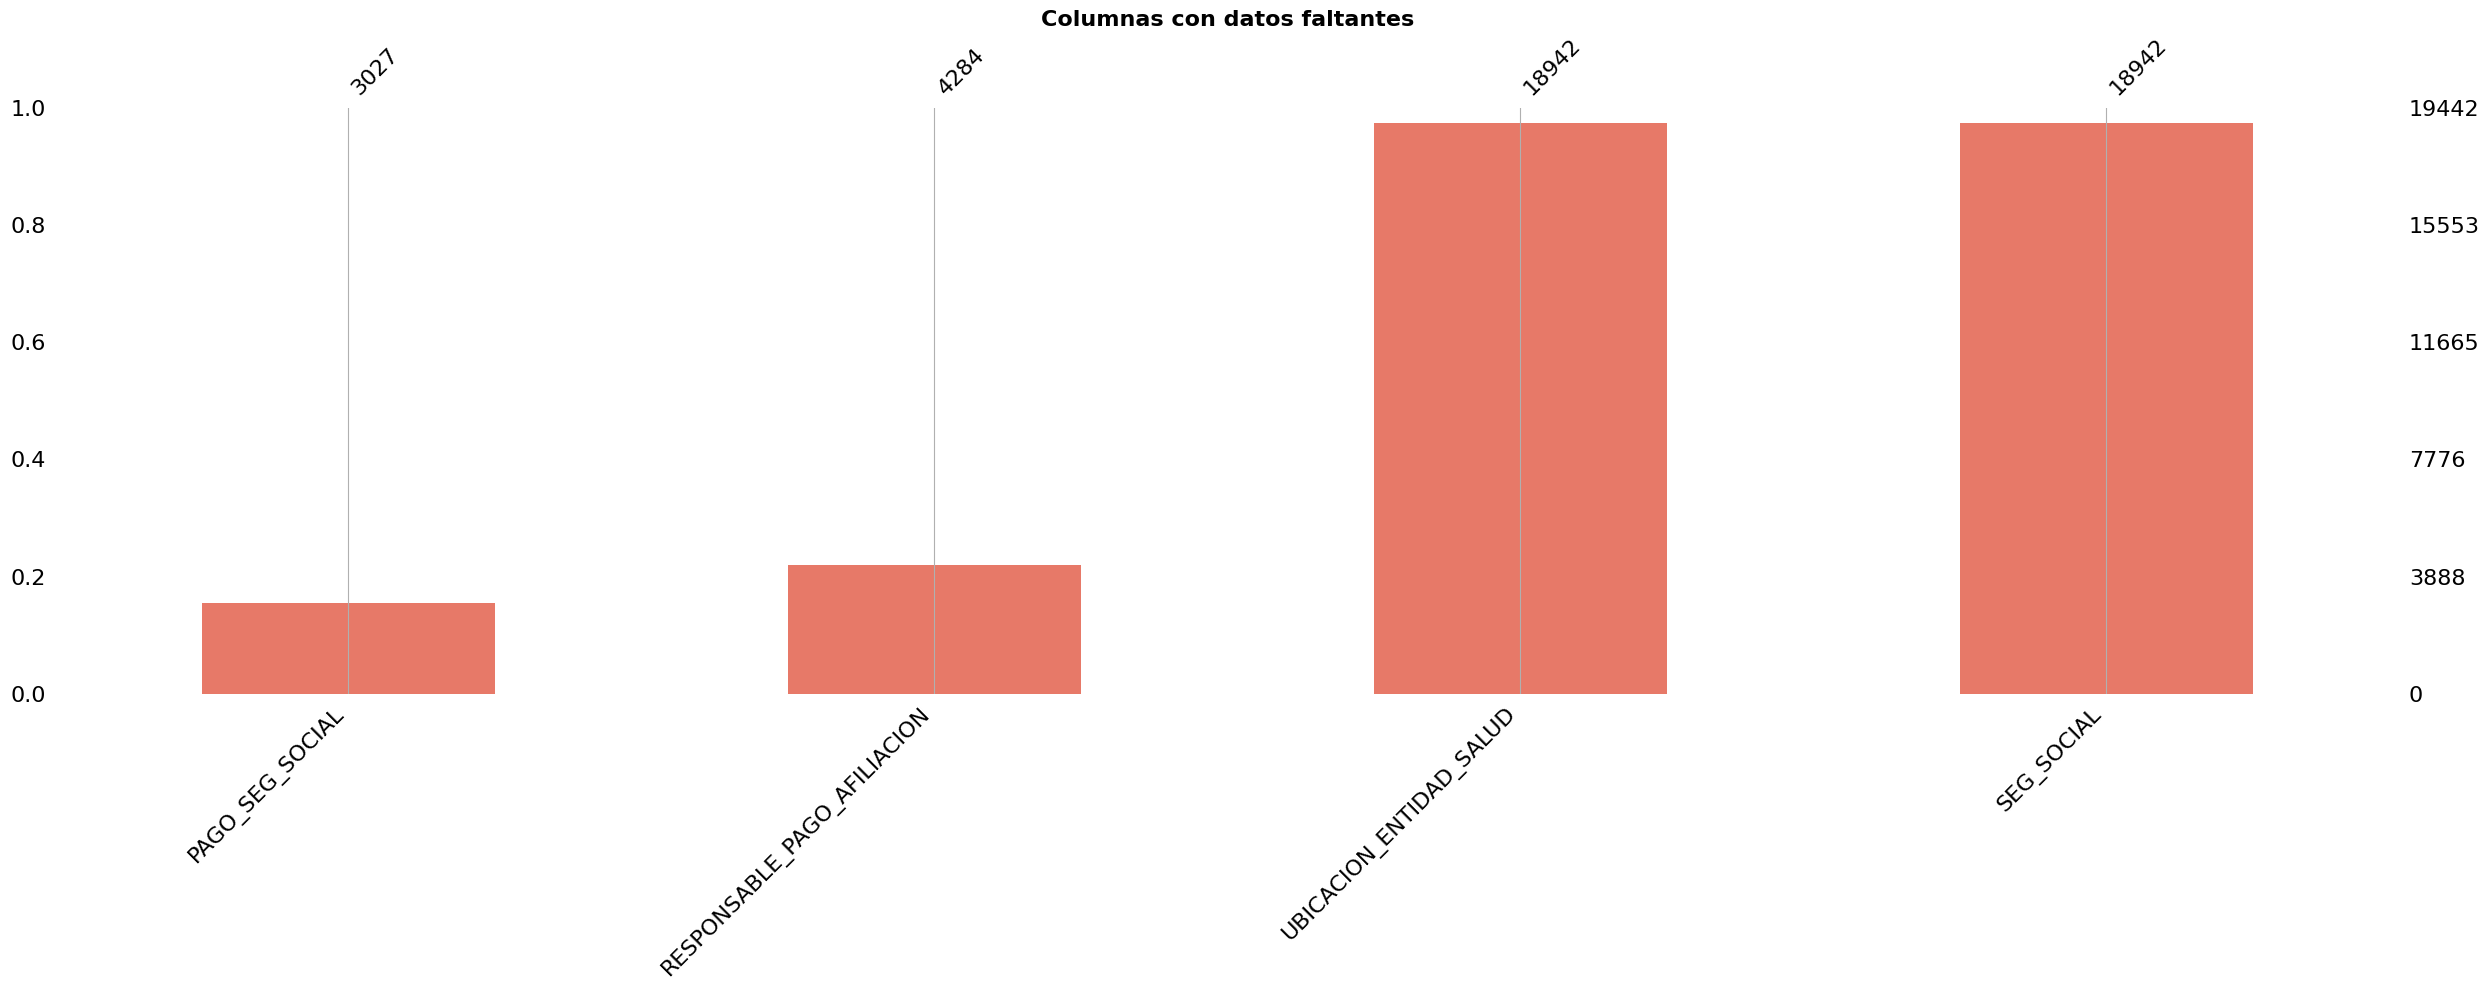

PAGO_SEG_SOCIAL                84.430614
RESPONSABLE_PAGO_AFILIACION    77.965230
UBICACION_ENTIDAD_SALUD         2.571752
SEG_SOCIAL                      2.571752
dtype: float64

In [31]:
analizar_columnas_faltantes(df_ecv)

Dado que las variables `PAGO_SEG_SOCIAL` y `RESPONSABLE_PAGO_AFILIACION` representan un alto % de valores faltantes, no se tendrán en cuenta para el estudio. (VER BIEN ESTA PARTE)

### **Casos por departamento y municipio**

In [32]:
casos_por_municipio = df_ecv.groupby('MUNICIPIO').size().reset_index(name='CASOS')
casos_por_municipio


,MUNICIPIO,CASOS
0,ACHÍ,65
1,AGUACHICA,204
2,AGUSTÍN CODAZZI,135
3,ALBANIA,104
4,ALTOS DEL ROSARIO,60
...,...,...
141,URUMITA,46
142,VALENCIA,102
143,VALLEDUPAR,720
144,VILLANUEVA,103


In [33]:
casos_por_departamento = df_ecv.groupby('DEPARTAMENTO').size().reset_index(name='CASOS')
casos_por_departamento

,DEPARTAMENTO,CASOS
0,ARCHIPIÉLAGO DE SAN ANDRÉS Y PROVIDENCIA Y SAN...,876
1,ATLÁNTICO,2730
2,BOLÍVAR,3068
3,CESAR,2508
4,CÓRDOBA,2581
5,LA GUAJIRA,2857
6,MAGDALENA,2186
7,SUCRE,2636


### **EDA**

In [34]:
profile = ProfileReport(df_ecv, title="Reporte general", config=config)
profile.to_file("reporte.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:00<00:00, 338.49it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## **Encuesta de cultura política**

In [94]:
df_ecc_democracia = pd.read_csv("C:\\Users\\CCOSTA397\\OneDrive\\Desktop\\CIDEACC\\convocatoria38\\raw_data\\data_ecc\\democracia_ecc_2023.CSV")
df_ecc_viviendas = pd.read_csv("C:\\Users\\CCOSTA397\\OneDrive\\Desktop\\CIDEACC\\convocatoria38\\raw_data\\data_ecc\\viviendas_ecc_2023.CSV")

In [95]:
df_ecc_democracia.shape, df_ecc_viviendas.shape

((46392, 172), (22994, 15))

In [96]:
df_ecc_viviendas = df_ecc_viviendas.drop_duplicates(subset='DIRECTORIO', keep='first')
df_ecc_democracia = df_ecc_democracia.drop_duplicates(subset='DIRECTORIO', keep='first')

### **Filtración por columnas de interés**

In [97]:
columnas_viviendas = ['DIRECTORIO', 'REGION','FEX_P']
df_ecc_viviendas = df_ecc_viviendas[columnas_viviendas]

columnas_democracia = ['DIRECTORIO', 'P5319', 'P5301', 'P5304S1', 'P5304S2', 'P5304S3', 'P5304S4', 'P5304S5', 'P5304S6', 
                       'P5304S9', 'P5304S10', 'P5306S1', 'P5306S2', 'P5306S3', 'P5306S4', 'P5306S5', 'P5306S6', 'P5306S7', 
                       'P6936S6', 'P5263S2', 'P5263S3']
df_ecc_democracia = df_ecc_democracia[columnas_democracia]

In [98]:
df_ecc = df_ecc_democracia.merge(df_ecc_viviendas, on='DIRECTORIO', how='left')
df_ecc.head()

,DIRECTORIO,P5319,P5301,P5304S1,P5304S2,P5304S3,P5304S4,P5304S5,P5304S6,P5304S9,...,P5306S3,P5306S4,P5306S5,P5306S6,P5306S7,P6936S6,P5263S2,P5263S3,REGION,FEX_P
0,112214,3,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,1,2,2,607.014979
1,112215,2,2,1,1,2,1,2,2,2,...,1,1,1,1,1,2,3,3,2,596.466248
2,112216,3,2,2,2,2,2,2,2,2,...,2,1,2,2,2,2,2,2,2,579.236307
3,112217,2,1,1,1,1,1,1,1,1,...,1,1,2,2,1,2,4,4,2,669.738808
4,112218,3,2,2,2,2,1,2,2,2,...,2,1,2,2,2,1,4,4,2,333.318880


### **Organización del conjunto de datos**

#### **Renombrado de variables**

In [99]:
df_ecc.columns

Index(['DIRECTORIO', 'P5319', 'P5301', 'P5304S1', 'P5304S2', 'P5304S3',
       'P5304S4', 'P5304S5', 'P5304S6', 'P5304S9', 'P5304S10', 'P5306S1',
       'P5306S2', 'P5306S3', 'P5306S4', 'P5306S5', 'P5306S6', 'P5306S7',
       'P6936S6', 'P5263S2', 'P5263S3', 'REGION', 'FEX_P'],
      dtype='object')

In [100]:
columnas_ecc = {
    'DIRECTORIO': 'ID',
    'P5319': 'PERCEPCION_DEMOCRACIA',
    'P5301': 'SATISFACCION_DEMOCRACIA',
    'P5304S1': 'RESPETO_ELEGIR_SER_ELEGIDO',
    'P5304S2': 'GARANTIA_PARTICIPAR',
    'P5304S3': 'LIBERTAD_EXPRESION',
    'P5304S4': 'LIBERTAD_PERTENENCIA_POLITICA',
    'P5304S5': 'GARANTIA_MANIFESTACION',
    'P5304S6': 'GARANTIA_IGUALDAD_LEY',
    'P5304S9': 'ACCESO_INFO_PUBLICA',
    'P5304S10': 'CONTROL_SOCIAL_ESTADO',
    'P5306S1': 'PROTECCION_VIDA_LIBERTAD',
    'P5306S2': 'PROTECCION_DERECHOS_SOCIALES',
    'P5306S3': 'PROTECCION_LIBERTAD_EXPRESION',
    'P5306S4': 'PROTECCION_RECREACION_CULTURA',
    'P5306S5': 'PROTECCION_DERECHOS_MINORIAS',
    'P5306S6': 'PROTECCION_DERECHOS_CAMPESINOS',
    'P5306S7': 'PROTECCION_DERECHOS_MUJERES',
    'P6936S6': 'RIESGOS_DERECHOS_COMUNIDAD',
    'P5263S2': 'CONFIANZA_ALCALDIA',
    'P5263S3': 'CONFIANZA_FUERZAS_MILITARES'
}
df_ecc = df_ecc.rename(columns = columnas_ecc)

In [101]:
columnas_ordenadas = [
    'ID', 'REGION', 'FEX_P', 'PERCEPCION_DEMOCRACIA', 'SATISFACCION_DEMOCRACIA',
    'RESPETO_ELEGIR_SER_ELEGIDO', 'GARANTIA_PARTICIPAR', 'LIBERTAD_EXPRESION',
    'LIBERTAD_PERTENENCIA_POLITICA', 'GARANTIA_MANIFESTACION', 'GARANTIA_IGUALDAD_LEY',
    'ACCESO_INFO_PUBLICA', 'CONTROL_SOCIAL_ESTADO', 'PROTECCION_VIDA_LIBERTAD',
    'PROTECCION_DERECHOS_SOCIALES', 'PROTECCION_LIBERTAD_EXPRESION',
    'PROTECCION_RECREACION_CULTURA', 'PROTECCION_DERECHOS_MINORIAS',
    'PROTECCION_DERECHOS_CAMPESINOS', 'PROTECCION_DERECHOS_MUJERES',
    'RIESGOS_DERECHOS_COMUNIDAD', 'CONFIANZA_ALCALDIA', 'CONFIANZA_FUERZAS_MILITARES'
]

df_ecc = df_ecc[columnas_ordenadas]

#### **Renombrado de categorías**

In [102]:
categorias_democracia = {
    1: 'Democrático',
    2: 'Medianamente democrático',
    3: 'No democrático'
}

categorias_democracia2 = {
    1: 'Muy insatisfecho(a)',
    2: 'Insatisfecho(a)',
    3: 'Ni satisfecho(a) ni insatisfecho(a)',
    4: 'Satisfecho(a)',
    5: 'Muy satisfecho(a)',
    99: 'No sabe/no informa'
}

categorias_confianza = {
    1: 'No confía',
    2: 'Confía poco',
    3: 'Ni mucho ni poco',
    4: 'Confía',
    5: 'Confía mucho',
    99: 'No sabe/No informa'
}
categorias_map = {1: 'SI', 2: 'NO', 99: 'No sabe/No informa'}

categorias_region = {
    1: 'Bogotá',
    2: 'Caribe',
    3: 'Oriental',
    4: 'Central',
    5: 'Pacífica'
}

In [103]:
df_ecc['REGION'] = df_ecc['REGION'].map(categorias_region)
df_ecc['PERCEPCION_DEMOCRACIA'] = df_ecc['PERCEPCION_DEMOCRACIA'].map(categorias_democracia)
df_ecc['SATISFACCION_DEMOCRACIA'] = df_ecc['SATISFACCION_DEMOCRACIA'].map(categorias_democracia2)
df_ecc['RESPETO_ELEGIR_SER_ELEGIDO'] = df_ecc['RESPETO_ELEGIR_SER_ELEGIDO'].map(categorias_map)
df_ecc['GARANTIA_PARTICIPAR'] = df_ecc['GARANTIA_PARTICIPAR'].map(categorias_map)
df_ecc['LIBERTAD_EXPRESION'] = df_ecc['LIBERTAD_EXPRESION'].map(categorias_map)
df_ecc['LIBERTAD_PERTENENCIA_POLITICA'] = df_ecc['LIBERTAD_PERTENENCIA_POLITICA'].map(categorias_map)
df_ecc['GARANTIA_MANIFESTACION'] = df_ecc['GARANTIA_MANIFESTACION'].map(categorias_map)
df_ecc['GARANTIA_IGUALDAD_LEY'] = df_ecc['GARANTIA_IGUALDAD_LEY'].map(categorias_map)
df_ecc['ACCESO_INFO_PUBLICA'] = df_ecc['ACCESO_INFO_PUBLICA'].map(categorias_map)
df_ecc['CONTROL_SOCIAL_ESTADO'] = df_ecc['CONTROL_SOCIAL_ESTADO'].map(categorias_map)
df_ecc['RIESGOS_DERECHOS_COMUNIDAD'] = df_ecc['RIESGOS_DERECHOS_COMUNIDAD'].map(categorias_map)
df_ecc['PROTECCION_VIDA_LIBERTAD'] = df_ecc['PROTECCION_VIDA_LIBERTAD'].map(categorias_map)
df_ecc['PROTECCION_DERECHOS_SOCIALES'] = df_ecc['PROTECCION_DERECHOS_SOCIALES'].map(categorias_map)
df_ecc['PROTECCION_LIBERTAD_EXPRESION'] = df_ecc['PROTECCION_LIBERTAD_EXPRESION'].map(categorias_map)
df_ecc['PROTECCION_RECREACION_CULTURA'] = df_ecc['PROTECCION_RECREACION_CULTURA'].map(categorias_map)
df_ecc['PROTECCION_DERECHOS_MINORIAS'] = df_ecc['PROTECCION_DERECHOS_MINORIAS'].map(categorias_map)
df_ecc['PROTECCION_DERECHOS_CAMPESINOS'] = df_ecc['PROTECCION_DERECHOS_CAMPESINOS'].map(categorias_map)
df_ecc['PROTECCION_DERECHOS_MUJERES'] = df_ecc['PROTECCION_DERECHOS_MUJERES'].map(categorias_map)
df_ecc['CONFIANZA_ALCALDIA'] = df_ecc['CONFIANZA_ALCALDIA'].map(categorias_confianza)
df_ecc['CONFIANZA_FUERZAS_MILITARES'] = df_ecc['CONFIANZA_FUERZAS_MILITARES'].map(categorias_confianza)


#### **Diccionario de variables**



| Variable             | Descripción                                                                                          | Categorías |
|------------------------------------|------------------------------------------------------------------------------------------------------|------------|
| `ID`                               | Identificación única de la encuesta realizada.                                                       | `Numérico` |
| `REGION`                               | Región donde está ubicado la persona encuestada.   <br> **En este caso solo se tendrá en cuenta la región Caribe**                                                   | `Bogotá`, `Caribe`, `Oriental`,`Central`,`Pacífica` |
| `FEX_P`                               | Factor de expansión muestral.                                                       | `Numérico` |
| `PERCEPCION_DEMOCRACIA`            | Percepción general sobre la democracia en Colombia.                                                  | `Democrático`<br>`Medianamente democrático`<br>`No democrático` |
| `SATISFACCION_DEMOCRACIA`          | Grado de satisfacción con el funcionamiento de la democracia en Colombia.                            | `Muy insatisfecho(a)`<br>`Insatisfecho(a)`<br>`Ni satisfecho(a) ni insatisfecho(a)`<br>`Satisfecho(a)`<br>`Muy satisfecho(a)`<br>`No sabe/no informa` |
| `RESPETO_ELEGIR_SER_ELEGIDO`       | Considera que en Colombia se respeta el derecho a elegir y ser elegido.                               | `SI`<br>`NO`<br>`No sabe/No informa` |
| `GARANTIA_PARTICIPACION`           | Considera que en Colombia se garantiza el derecho a participar.                                       | `SI`<br>`NO`<br>`No sabe/No informa` |
| `LIBERTAD_EXPRESION`               | Considera que en Colombia existe libertad para expresar y difundir el pensamiento.                   | `SI`<br>`NO`<br>`No sabe/No informa` |
| `LIBERTAD_PERTENENCIA_POLITICA`    | Considera que en Colombia existe libertad para pertenecer a partidos y movimientos políticos.         | `SI`<br>`NO`<br>`No sabe/No informa` |
| `GARANTIA_MANIFESTACION`           | Considera que en Colombia existen garantías para manifestarse públicamente.                          | `SI`<br>`NO`<br>`No sabe/No informa` |
| `IGUALDAD_ANTE_LA_LEY`            | Considera que en Colombia se garantiza el derecho a la igualdad ante la ley.                          | `SI`<br>`NO`<br>`No sabe/No informa` |
| `ACCESO_INFO_PUBLICA`              | Considera que en Colombia se facilita el acceso de los ciudadanos a la información pública.           | `SI`<br>`NO`<br>`No sabe/No informa` |
| `CONTROL_SOCIAL_GESTION`           | Considera que en Colombia se permite a los ciudadanos ejercer control social sobre la gestión del Estado. | `SI`<br>`NO`<br>`No sabe/No informa` |
| `PROTECCION_VIDA_LIBERTAD`         | Considera que en Colombia se protegen los derechos a la vida, libertad, integridad y seguridad.        | `SI`<br>`NO`<br>`No sabe/No informa` |
| `PROTECCION_DERECHOS_SOCIALES`     | Considera que en Colombia se protegen los derechos a educación, salud, seguridad social, trabajo y vivienda. | `SI`<br>`NO`<br>`No sabe/No informa` |
| `PROTECCION_LIBERTAD_INFORMACION`  | Considera que en Colombia se protegen los derechos a la libertad de expresión, conciencia y divulgación de información. | `SI`<br>`NO`<br>`No sabe/No informa` |
| `PROTECCION_RECREACION_CULTURA`    | Considera que en Colombia se protegen los derechos a la recreación y la cultura.                      | `SI`<br>`NO`<br>`No sabe/No informa` |
| `PROTECCION_DERECHOS_MINORIAS`     | Considera que en Colombia se protegen los derechos de las minorías étnicas y sociales.                | `SI`<br>`NO`<br>`No sabe/No informa` |
| `PROTECCION_DERECHOS_CAMPESINOS`   | Considera que en Colombia se protegen los derechos del campesinado.                                   | `SI`<br>`NO`<br>`No sabe/No informa` |
| `PROTECCION_DERECHOS_MUJERES`      | Considera que en Colombia se protegen los derechos de las mujeres.                                    | `SI`<br>`NO`<br>`No sabe/No informa` |
| `RIESGOS_COMUNIDAD`                | Percepción sobre si en el último año surgieron riesgos en la comunidad del encuestado contra la vida, libertad e integridad (por ejemplo, estigmatización o discriminación). | `SI`<br>`NO`<br>`No sabe/No informa` |
| `CONFIANZA_ALCALDIA`               | Nivel de confianza del encuestado en la Alcaldía Municipal o Distrital.                               | `No confía`<br>`Confía poco`<br>`Ni mucho ni poco`<br>`Confía`<br>`Confía mucho`<br>`No sabe/No informa` |
| `CONFIANZA_FUERZAS_MILITARES`      | Nivel de confianza del encuestado en las Fuerzas Militares (Ejército, Armada y Fuerza Aérea).        | `No confía`<br>`Confía poco`<br>`Ni mucho ni poco`<br>`Confía`<br>`Confía mucho`<br>`No sabe/No informa` |


### **Datos faltantes**

In [104]:
analizar_columnas_faltantes(df_ecc)

No hay datos faltantes.


### **Filtración del conjunto de datos: Región Caribe**

In [105]:
df_ecc.shape

(22990, 23)

In [106]:
df_ecc_caribe = df_ecc[df_ecc['REGION'] == 'Caribe']
df_ecc_caribe.shape

(4628, 23)

## **Data 2**

In [ ]:
url = "C:\\Users\\CCOSTA397\\OneDrive\\Desktop\\CIDEACC\\convocatoria38\\raw_data\\data_sievcac.csv"
data2 = pd.read_csv(url)

In [ ]:
data2

,ID Caso,ID Caso Relacionado,Año,Mes,Día,Código DANE de Municipio,Municipio,Departamento,Región,Modalidad,...,Grupos Posdesmovilización,Combatientes Sin Información,Otros Grupos Armados Organizados,Total Combatientes de Grupos Armados Organizados,Total Combatientes,Personas Sin Información,Total Civiles,Ventaja Militar,Total de Víctimas del Caso,latitud-longitud
0,1,CR000497,2006,3,12,27073,BAGADO,CHOCO,ATRATO,COMBATE Y/O CONTACTO ARMADO,...,0,0,0,0,0,0,1,GRUPOS ARMADOS ORGANIZADOS,1,POINT (-76.197969065 5.503119772)
1,10,CR080150,0,0,0,00000,SIN INFORMACION,SIN INFORMACION,SIN INFORMACION,OPERACIÓN MILITAR,...,0,0,0,1,1,0,0,FUERZAS ARMADAS ESTATALES,1,POINT (-72 4)
2,100,NaN,0,0,0,05854,VALDIVIA,ANTIOQUIA,NORTE DE ANTIOQUIA,COMBATIENTE MUERTO EN CIRCUNSTANCIA NO DETERMI...,...,0,0,0,2,2,0,0,GRUPOS ARMADOS ORGANIZADOS,2,POINT (-75.40094502 7.265404213)
3,1000,CR044183,1966,1,31,41676,SANTA MARIA,HUILA,NORTE DEL HUILA,COMBATE Y/O CONTACTO ARMADO,...,0,0,0,6,6,0,0,GRUPOS ARMADOS ORGANIZADOS,6,POINT (-75.587213 2.937628)
4,10000,NaN,1996,2,17,85010,AGUAZUL,CASANARE,PIEDEMONTE LLANERO,COMBATE Y/O CONTACTO ARMADO,...,0,0,0,2,2,0,0,FUERZAS ARMADAS ESTATALES,2,POINT (-72.45852372 5.100675341)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38328,9995,NaN,1996,2,13,50577,PUERTO LLERAS,META,ARIARI GUAYABERO,HOSTIGAMIENTO,...,0,0,0,0,0,0,1,GRUPOS ARMADOS ORGANIZADOS,1,POINT (-73.36990579 3.016221505)
38329,9996,NaN,1996,2,14,54003,ABREGO,NORTE DE SANTANDER,PROVINCIA DE RICAURTE,COMBATE Y/O CONTACTO ARMADO,...,0,0,0,0,0,0,0,FUERZAS ARMADAS ESTATALES,0,POINT (-73.15850485 8.019834481)
38330,9997,NaN,1996,2,15,05837,TURBO,ANTIOQUIA,URABA,COMBATE Y/O CONTACTO ARMADO,...,0,0,0,2,2,0,0,FUERZAS ARMADAS ESTATALES,2,POINT (-76.6322473 7.996897954)
38331,9998,NaN,1996,2,15,23660,SAHAGUN,CORDOBA,NORTE DE CORDOBA,OPERACIÓN MILITAR,...,0,0,0,0,1,0,0,GRUPOS ARMADOS ORGANIZADOS,1,POINT (-75.42925664 8.799007016)


In [ ]:

data2 = data2[data2["Departamento"].isin(dpto_region_caribe)]
data2['Departamento'].value_counts()

Departamento
BOLIVAR                                                     1083
CESAR                                                        994
CORDOBA                                                      687
MAGDALENA                                                    522
LA GUAJIRA                                                   380
SUCRE                                                        334
ATLANTICO                                                     84
ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA       3
Name: count, dtype: int64

In [ ]:
data2['Región'].value_counts()

Región
SIERRA NEVADA DE SANTA MARTA                                864
MAGDALENA MEDIO                                             759
SERRANIA DEL PERIJA                                         481
MONTES DE MARIA                                             389
ALTO SINU Y SAN JORGE                                       333
URABA                                                       241
LA MOJANA                                                   196
SUR DE CESAR                                                117
CANAL DEL DIQUE                                             115
SUR DE BOLIVAR                                               97
MORROSQUILLO Y SABANAS DE SUCRE                              93
ALTA GUAJIRA                                                 83
NORTE DE CORDOBA                                             75
NORTE DE ATLANTICO                                           71
CIENAGA GRANDE DE SANTA MARTA                                55
SUR DE MAGDALENA                 

In [ ]:
data2.head()

,ID Caso,ID Caso Relacionado,Año,Mes,Día,Código DANE de Municipio,Municipio,Departamento,Región,Modalidad,...,Grupos Posdesmovilización,Combatientes Sin Información,Otros Grupos Armados Organizados,Total Combatientes de Grupos Armados Organizados,Total Combatientes,Personas Sin Información,Total Civiles,Ventaja Militar,Total de Víctimas del Caso,latitud-longitud
6,10002,NaN,1996,2,17,20238,EL COPEY,CESAR,SIERRA NEVADA DE SANTA MARTA,HOSTIGAMIENTO,...,0,0,0,0,1,0,0,GRUPOS ARMADOS ORGANIZADOS,1,POINT (-73.91282064 10.19995356)
8,10004,NaN,1996,2,17,20238,EL COPEY,CESAR,SIERRA NEVADA DE SANTA MARTA,EMBOSCADA,...,0,0,0,0,6,0,0,GRUPOS ARMADOS ORGANIZADOS,6,POINT (-73.91282064 10.19995356)
27,10021,NaN,1996,3,3,20550,PELAYA,CESAR,SUR DE CESAR,HOSTIGAMIENTO,...,0,0,0,0,0,0,0,SIN INFORMACIÓN,0,POINT (-73.63295546 8.764116734)
31,10025,NaN,1996,3,7,20001,VALLEDUPAR,CESAR,SIERRA NEVADA DE SANTA MARTA,COMBATE Y/O CONTACTO ARMADO,...,0,0,0,0,0,0,0,GRUPOS ARMADOS ORGANIZADOS,0,POINT (-73.45784764 10.21890277)
39,10032,NaN,1996,3,11,08001,BARRANQUILLA,ATLANTICO,NORTE DE ATLANTICO,HOSTIGAMIENTO,...,0,0,0,0,0,0,0,GRUPOS ARMADOS ORGANIZADOS,0,POINT (-74.82771544 10.98152051)


In [ ]:
data2['Grupo Armado 2'].value_counts(dropna=False)

Grupo Armado 2
GUERRILLA                       3023
GRUPO PARAMILITAR                281
GRUPO POSDESMOVILIZACIÓN         236
DESCONOCIDO                      207
GRUPO ARMADO NO IDENTIFICADO     171
AGENTE DEL ESTADO                 80
OTRO ¿CUÁL?                       49
BANDOLERISMO                      26
CRIMEN ORGANIZADO                  8
GRUPO ARMADO NO DIRIMIDO           6
Name: count, dtype: int64

In [ ]:
columnas_de_interes = ['Año', 'Mes', 'Día', 'Departamento', 'Municipio', 'Región', 'Código DANE de Municipio'
                       'Región', 'Modalidad', 'Grupo Armado 1', 'Grupo Armado 2',  ]

In [ ]:
columnas_de_no_interes = ['ID Caso' , 'ID Caso Relacionado']

En dimensión política tener en cuenta lo del conflicto armado.

Acciones bélicas son operaciones o actividades militares que se realizan en el contexto de un conflicto armado o guerra. Estas acciones incluyen combates, enfrentamientos, emboscadas, ataques, hostigamientos y otras maniobras tácticas o estratégicas llevadas a cabo por fuerzas militares o grupos armados para lograr objetivos militares o políticos.

En el contexto de la base de datos que muestras, las acciones bélicas se refieren a esos eventos violentos donde están involucrados distintos actores armados, como guerrillas, fuerzas estatales, grupos paramilitares, o agentes extranjeros, y que tienen consecuencias directas en términos de enfrentamientos o violencia organizada.

Ejemplos de acciones bélicas en la base de datos podrían ser:

- Combates directos entre grupos armados
- Operaciones militares ofensivas o defensivas
- Emboscadas o ataques sorpresa
- Hostigamientos o ataques continuos en un área específica